<font size="5">__EX 1__</font>

Importer la base de données data_dm3.csv disponible depuis le lien https://bitbucket. org/portierf/shared_files/downloads/data_dm3.csv. La dernière colonne est la va- riable à expliquer. Les autres colonnes sont les variables explicatives. Préciser le nombre de variables explicatives et le nombre d’observations.

In [17]:
import pandas as pd
data = pd.read_csv("/Users/didi/Documents/Telecom/MDI720/data_dm3.csv", header = None)
print('Réponse: Le nombre de variable explicatives est', data.shape[1], '. Le nombre observations est', data.shape[0], '.')


Réponse: Le nombre de variable explicatives est 211 . Le nombre observations est 442 .


<font size="5">__EX 2__</font>

Les variables explicatives sont-elles centrées? Normalisées? Qu’en est-il de la variable à expliquer ? Tracer un scatter plot de la base de données avec 4 covariables prises au hasard et la variable à expliquer (un scatterplot regroupe les graphes de chacune des variables en fonction de chacune des autres). Commenter les graphiques obtenus.

Réponse: 
La moyenne des 4 variables explicative aléatoires sont presque zéro :
 64    -1.230790e-17
82     1.237070e-17
182    4.018907e-18
169    1.708035e-17
dtype: float64 
Donc elles sont quasiment normalisées. 
Et par le graphe on peut voir que la plupart d entre elles sont presque centrées.


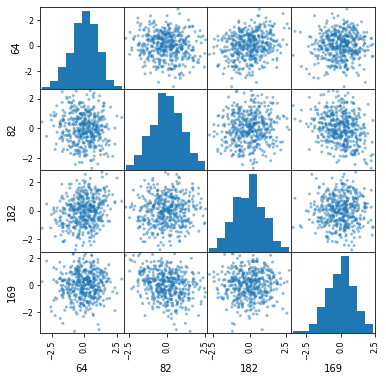

In [20]:
from pandas.plotting import scatter_matrix
import random
randomchoose = random.sample(range(209), 4)
scatter_matrix(data[randomchoose],alpha = 0.5, figsize = (6, 6))
print('Réponse: \nLa moyenne des 4 variables explicative aléatoires sont presque zéro :\n', data[randomchoose].mean(), '\nDonc elles sont quasiment normalisées. \nEt par le graphe on peut voir que la plupart d entre elles sont presque centrées.')


<font size="5">__EX 3__</font>

Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle Xtrain, un pour tester le modèle Xtest. On mettra 20% de la base dans l’échantillon ’test’. Donner les tailles de chacun des 2 échantillons. On notera que le nouvel échantillon de covariables Xtrain n’est pas normalizé. Dans la suite, on fera donc bien attention à inclure l’intercept dans nos régression.

In [21]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)
Y_train = train[[210]]
X_train = train.drop(columns = [210])
Y_test = test[[210]]
X_test = test.drop(columns = [210])
print('Réponse: \nLa taille de échantillon train est:', X_train.shape, '\nLa taille de échantillon test est:', Y_train.shape )

Réponse: 
La taille de échantillon train est: (353, 210) 
La taille de échantillon test est: (353, 1)


<font size="5">__EX 4__</font>

Donner la matrice de covariance calculée sur Xtrain. Tracer le graphe de la décroissance des valeurs propres de la matrice de covariance (ou de corrélation). Expliquer pourquoi il est légitime de ne garder que les premières variables de l’ACP. On gardera 60 variables dans la suite.

Réponse: 
La matrice de covariance de X_train est:
           0         1         2         3         4         5         6    \
0    1.062231 -0.173754 -0.054321 -0.270426  0.176967  0.156212 -0.030729   
1   -0.173754  1.007886  0.128274 -0.222164 -0.162507 -0.099576  0.151041   
2   -0.054321  0.128274  0.980479 -0.179097  0.128610 -0.095164 -0.028408   
3   -0.270426 -0.222164 -0.179097  0.936825  0.017570 -0.071812  0.112779   
4    0.176967 -0.162507  0.128610  0.017570  1.055070 -0.048351  0.026864   
..        ...       ...       ...       ...       ...       ...       ...   
205 -0.043396  0.094341  0.144617 -0.208131 -0.100096  0.017313 -0.013749   
206 -0.115708  0.008602 -0.023485  0.093307  0.037936  0.058826  0.044720   
207 -0.016827 -0.173471 -0.327494  0.008712 -0.032134  0.253924  0.096936   
208  0.198924 -0.068307  0.032120 -0.161407  0.051732  0.067506  0.032934   
209 -0.063989  0.076618 -0.143587 -0.390022 -0.076943  0.184935  0.036487   

          7         8  

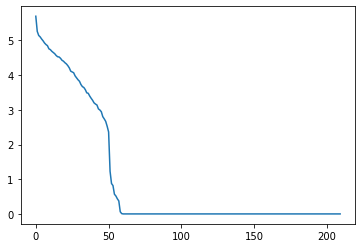

In [22]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

#chercher la matrice de covariance X_train
print('Réponse:', '\nLa matrice de covariance de X_train est:\n',X_train.cov())

#chercher les valeurs propres de la matrice de covariance
eigenvalue, eigenvector = LA.eig(X_train.cov())
eigenvalue = np.real(eigenvalue)
eigenvector = np.real(eigenvector)
plt.plot(- np.sort(-eigenvalue, axis=None))
idx = (-eigenvalue).argsort()
eigenvector_PCA = eigenvector[:,idx][:,range(60)]

print('Réponse:', '\nLes premières valeurs propres représentes les variables les plus explicatives. Les valeurs propres tendent vers zéro à partir de 60 valeurs comme montré dans image:\n')

<font size="5">__EX 5__</font>

Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS" qui consiste à appliquer OLS avec Y et XtrainV(1:60), où V(1:60) contient les vecteurs propres (associés aux 60 plus grandes valeurs propres) de la matrice de covariance. Faire une ré- gression linéaire (avec intercept), puis tracer les valeurs des coefficients (hors intercept). Sur un autre graphique, faire de même avec la méthode des moindres carrés classique.


Réponse: 
Les valeurs des coefficients pour PCA before OLS sont:


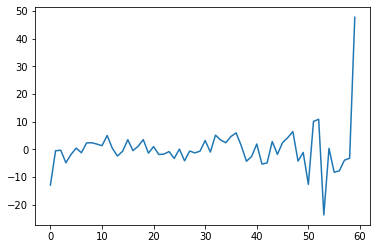

Les valeurs des coefficients pour OLS classique sont:


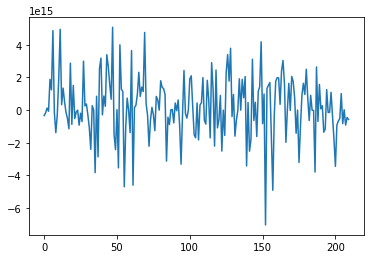

In [23]:
from sklearn.linear_model import LinearRegression

#PCA before OLS, faire OLS sur X_60 et Y_train
X_60 = X_train.dot(eigenvector_PCA) 
reg_PCA = LinearRegression(fit_intercept = True).fit(X_60, Y_train)
print('Réponse: \nLes valeurs des coefficients pour PCA before OLS sont:')
plt.plot(reg_PCA.coef_[0])
plt.show()
#OLS classique, faire OLS sur X_train et Y_train
reg_OLS = LinearRegression(fit_intercept = True).fit(X_train, Y_train)
print('Les valeurs des coefficients pour OLS classique sont:')
plt.plot(reg_OLS.coef_[0])


<font size="5">__EX 6__</font>

Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur moyenne de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ? Commenter. Uniquement pour cette question, centrer et réduire les variables après ACP (de petite dimension). Faire une régression avec ces variables et vérifier que l’intercept est bien égal à la moyenne de Y sut le train.

In [24]:
print('Réponse: \nLe intercept de "PCA before OLS" est', round(reg_PCA.intercept_[0],3), ', le intercept de "OLS classique" est', round(reg_OLS.intercept_[0],3), '\nLa moyenne de Y est', round(Y_train.mean().values[0],3)) 
print('Commentaire: Le intercept de "PCA before OLS" est plus élevé que le intercept de "OLS classique".')

Réponse: 
Le intercept de "PCA before OLS" est 151.534 , le intercept de "OLS classique" est 151.391 
La moyenne de Y est 153.266
Commentaire: Le intercept de "PCA before OLS" est plus élevé que le intercept de "OLS classique".


In [25]:
X_60_r = X_60 - X_60.mean()
X_60_c = X_60_r/np.sqrt(X_60.var(axis = 0))
reg_cr = LinearRegression(fit_intercept=True).fit(X_60_c, Y_train)
print('Réponse: \nLe intercept après centrer et réduire les variables de PCA est', reg_cr.intercept_[0])
print('Le moyen de Y_train est', Y_train.mean().values[0])
print('Conclusion: le intercept après centrer et réduire les variables de PCA est égal à le moyen de Y_train.')


Réponse: 
Le intercept après centrer et réduire les variables de PCA est 153.26628895184135
Le moyen de Y_train est 153.26628895184135
Conclusion: le intercept après centrer et réduire les variables de PCA est égal à le moyen de Y_train.


<font size="5">__EX 7__</font>

Pour les 2 méthodes (OLS et PCA before OLS) : Tracer les résidus de la prédiction sur l’échantillon test. Tracer leur densité (on pourra par exemple utiliser un histogramme). Calculer le coefficient de détermination sur l’échantillon test. Calculer le risque de prédiction sur l’échantillon test.

Réponse: 
Le coefficient de détermination sur l’échantillon test pour OLS est: 0.1689669575722964
Le coefficient de détermination sur l’échantillon test pour PCA est: 0.34659558875973795

Le risque de prédiction sur l’échantillon test pour OLS est: 4371.79866643199
Le risque de prédiction sur l’échantillon test pour PCA est: 3437.351330045899

Conclusion: la méthode " PCA before OLS" est mieux que la méthode simple de OLS.


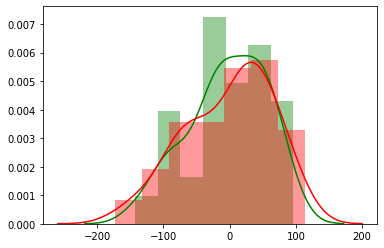

In [47]:
import seaborn as sns, numpy as np
from sklearn.metrics import mean_squared_error

#PCA before OLS methode
X_test_PCA = X_test.dot(eigenvector_PCA)
residu_PCA = reg_PCA.predict(X_test_PCA) - Y_test
r1 = sns.distplot(residu_PCA, color = 'g')
coefdet_PCA = 1 - (np.sum(np.square(np.asarray(residu_PCA)))/np.sum(np.square(Y_test - Y_test.mean())))
predrisk_PCA = mean_squared_error(reg_PCA.predict(X_test_PCA),Y_test)

#OLS methode
residu_OLS = reg_OLS.predict(X_test) - Y_test
r2 = sns.distplot(residu_OLS, color = 'r')
coefdet_OLS = 1 - (np.sum(np.square(np.asarray(residu_OLS)))/np.sum(np.square(Y_test - Y_test.mean())))
predrisk_OLS = mean_squared_error(reg_OLS.predict(X_test),Y_test)

print('Réponse: \nLe coefficient de détermination sur l’échantillon test pour OLS est:',coefdet_OLS.values[0])
print('Le coefficient de détermination sur l’échantillon test pour PCA est:',coefdet_PCA.values[0])
print('\nLe risque de prédiction sur l’échantillon test pour OLS est:',predrisk_OLS)
print('Le risque de prédiction sur l’échantillon test pour PCA est:',predrisk_PCA)
print('\nConclusion: la méthode " PCA before OLS" est mieux que la méthode simple de OLS.')


<font size="5">__EX 8__</font>

Coder la méthode de forward variable sélection. On pourra utiliser la statistique du test de nullité du coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arret sur la méthode. C’est à dire que l’on ajoute une variable à chaque étape jusqu’à retrouver la totalité des variables. Afficher l’ordre de séléction des variables.

In [28]:
from scipy import stats

p_val_ordered = []
col = []
residu = np.asarray(Y_train)
p_valmin = 1

for j in range(X_train.shape[1]): #find all P-value with ascending order
    p_valmin = 1
    for i in range(X_train.shape[1]):#find each minimun P-value
        if i not in col:
            X_i = np.array(X_train.loc[:,i]).reshape(-1,1)
            n = len(Y_train)
            model_i = LinearRegression(fit_intercept = True).fit(X_i, residu)
            Y_predict = model_i.predict(X_i)
            diff = residu - Y_predict
            sigma = np.sqrt(np.sum(diff*diff)/(n-2))
            Gn = np.sqrt(1/np.sum(np.square((X_i - X_i.mean()))))
            t_stat = abs(model_i.coef_[0])/(sigma*Gn)
            p_val = (1 - stats.t.cdf(abs(t_stat), n-2)) * 2 #calculate p_value for each parameter in X
            if p_val < p_valmin:
                p_valmin = p_val
                col_p = i
                residu = diff
                
    p_val_ordered.append(p_valmin)
    col.append(col_p)

print('Réponse: \nL’ordre de séléction des variables est:\n', col)


Réponse: 
L’ordre de séléction des variables est:
 [58, 34, 123, 167, 135, 29, 155, 174, 171, 111, 150, 54, 48, 184, 117, 116, 153, 96, 133, 79, 100, 177, 71, 183, 109, 73, 114, 172, 108, 195, 196, 64, 148, 191, 122, 141, 165, 205, 38, 120, 193, 190, 126, 26, 201, 127, 63, 103, 134, 180, 198, 192, 189, 208, 156, 115, 94, 199, 159, 36, 99, 162, 128, 161, 186, 140, 88, 188, 90, 152, 163, 139, 206, 169, 166, 144, 154, 89, 203, 137, 104, 130, 170, 78, 158, 160, 207, 181, 83, 70, 151, 176, 97, 113, 209, 179, 17, 107, 202, 119, 131, 60, 142, 147, 50, 182, 91, 200, 53, 118, 204, 125, 178, 149, 197, 129, 39, 74, 72, 92, 62, 93, 146, 143, 57, 168, 56, 105, 132, 75, 76, 175, 40, 35, 110, 86, 87, 187, 32, 45, 157, 102, 145, 49, 124, 194, 95, 112, 28, 80, 33, 106, 66, 98, 101, 65, 185, 67, 173, 85, 15, 51, 164, 82, 77, 47, 81, 136, 69, 84, 22, 19, 27, 46, 55, 68, 30, 10, 37, 44, 52, 13, 20, 41, 18, 14, 24, 121, 61, 59, 16, 21, 42, 25, 138, 43, 11, 31, 8, 12, 6, 7, 9, 23, 1, 3, 4, 2, 0, 5]


<font size="5">__EX 9__</font>

Critère d’arrêt : On décide d’arrêter lorsque la p-valeur dépasse 0.1. Illustrer la méthode en donnant (i) les 3 graphes des statistiques obtenues lors de la sélection de la 1er, 2eme et 3eme variables (en abscisse : l’index des variables, en ordonné : la valeur des stats) , (ii) le graphe des 50 premières p-valeurs (dont chacune est associée à la variable sélectionnée). Sur ce même graphe, on tracera la ligne horizontale d’ordonnée 0.1. Enfin on donnera la liste des variables sélectionnées.

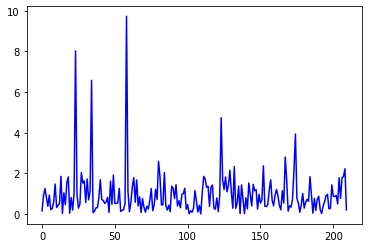

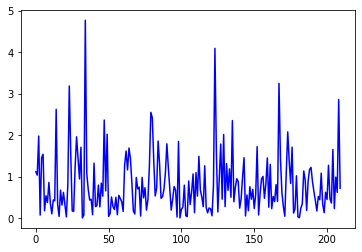

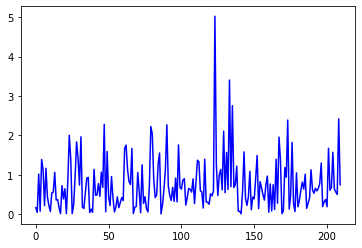

Réponse: 
We stop after 5 parameters [58, 34, 123, 167, 135]


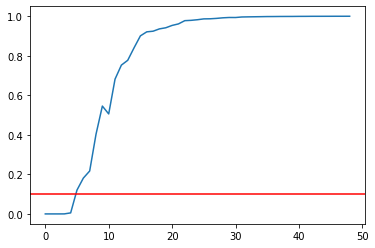

In [37]:
#3 statistical graphs with variable index on horizontal axis, and stats value on vertical axis.
#(i) les 3 graphes des statistiques obtenues lors de la sélection de la 1er, 2eme et 3eme variables
residu = np.asarray(Y_train)
p_valmin = 1
col = []
for j in range(50): #find all P-value with ascending order
    t = []
    idx = []
    p_valmin = 1
    for i in range(X_train.shape[1]):#find each minimun P-value
        if i not in col:
            X_i = np.array(X_train.loc[:,i]).reshape(-1,1)
            n = len(Y_train)
            model_i = LinearRegression(fit_intercept = True).fit(X_i, residu)
            Y_predict = model_i.predict(X_i)
            diff = residu - Y_predict
            sigma = np.sqrt(np.sum(diff*diff)/(n-2))
            Gn = np.sqrt(1/(np.sum(np.square(X_i - X_i.mean()))))
            t_stat = abs(model_i.coef_[0])/(sigma*Gn)
            p_val = (1 - stats.t.cdf(abs(t_stat), len(Y_train)-2)) * 2 #calculate p_value for each parameter in X
            t.append(t_stat)
            idx.append(i)
            if p_val < p_valmin:
                col_p = i
                p_valmin = p_val
                residu = diff  
    
    p_val_ordered.append(p_valmin)
    col.append(col_p)
    
    if j < 3:
        plt.plot(idx, t, 'b')
        plt.show()
    
#(ii) le graphe des 50 premières p-valeurs (dont chacune est associée à la variable sélectionnée)
plt.plot(p_val_ordered[:49])
plt.axhline(y=0.1, color='r', linestyle='-')


#donnera la liste des variables sélectionnées
count = 0
for i in p_val_ordered:
    if i <= 0.1:
        count = count + 1
    else:
        break
print('Réponse: \nWe stop after', count , 'parameters', col[:count] )

<font size="5">__EX 10__</font>

Appliquer OLS sur les variables sélectionnées. Donner le risque de prédiction obtenu l’échantillon test et le comparer à ceux de OLS et PCA before OLS.

In [30]:
#risque de prédiction Forward
X_forward = X_train[col[:count]]
reg_forward = LinearRegression(fit_intercept = True).fit(X_forward, Y_train)
Y_pred_forward = reg_forward.predict(X_forward)
predrisk_forward = mean_squared_error(Y_pred_forward, Y_train)
print('Réponse: \nLe risque de prédiction obtenu l’échantillon test pour la méthode forward est', predrisk_forward)
print('Il est plus petit que les risques de prédiction de OLS et PCA qui sont de', predrisk_OLS, 'et', predrisk_PCA)


Réponse: 
Le risque de prédiction obtenu l’échantillon test pour la méthode forward est 2966.3297650453123
Il est plus petit que les risques de prédiction de OLS et PCA qui sont de 4371.79866643199 et 3437.351330045899


<font size="5">__EX 11__</font>

Afin de préparer la validation croisée, séparer l’échantillon train en 4 parties (appelées ”folds”) de façon aléatoire. On affichera les numéros d’échantillon sélectionnés dans chaque fold.

In [31]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, random_state=10, shuffle=True)
_folds = kf.split(X_train)
folds = []

j = 0
for train_index, test_index in _folds:
    j += 1
    print("\n\ntrain number", j, ":\n", train_index, "\ntest number", j, " :\n", test_index)
    folds.append([train_index, test_index])
    
print(folds)



train number 1 :
 [  0   2   3   4   5   7   8   9  10  11  13  14  15  16  18  19  21  22
  23  28  30  31  32  33  35  36  37  38  39  40  41  42  44  45  46  48
  49  50  51  53  54  55  58  59  60  61  62  63  66  67  68  70  71  72
  73  74  75  77  79  81  82  83  84  85  86  89  90  91  93  94  95  96
  98  99 101 103 104 106 107 108 109 111 112 115 116 117 118 119 120 122
 123 124 125 127 128 129 131 132 133 134 135 136 137 140 141 143 144 145
 149 150 153 154 155 156 157 158 159 160 161 162 165 166 168 169 171 176
 177 178 179 180 182 184 185 186 187 188 190 191 192 193 194 195 196 198
 199 200 201 203 204 206 207 208 209 210 212 213 214 216 217 220 221 222
 223 224 226 228 230 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 248 249 250 251 252 253 254 255 256 258 259 260 261 262 263 265
 267 268 269 270 271 273 274 275 276 279 281 283 284 285 286 287 288 289
 290 291 292 293 294 295 297 298 299 300 302 304 305 306 307 308 309 311
 312 313 315 316 318 319 320 32

<font size="5">__EX 12__</font>

Appliquer la méthode de la régression ridge. Pour le choix du paramètre de régularisation, on fera une validation croisée sur les ”folds” définies lors de la question précédente. A tour de rôle chacune des ”folds” servira pour calculer le risque de prédiction alors que les autres seront utilisées pour estimer le modèle. On moyennera ensuite les 4 risques de prédictions. On donnera la courbe du risque de validation croisée en fonction du paramètre de régularisation (on veillera à bien choisir l’espace de définition pour le graphe). Donner le paramètre de régularisation optimal et la valeur du risque sur le test.

Réponse:
Le paramètre de régularisation optimal est 33.15789473684211
La valeur du risque sur le test est 3649.798463843836


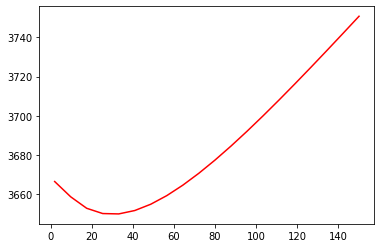

In [39]:
from sklearn import linear_model

#generate alphas
alphas = np.linspace(2, 150, 20)

#calculate cross validation of prediction risks
predrisk_ridge_mean = []
predrisk_ridge_min = 10000
alpha_min = 0

for alpha in alphas:
    predrisk_ridge = []
    for i_train, i_test in folds:
        model_ridge = linear_model.Ridge(alpha=alpha).fit(X_train.iloc[i_train], Y_train.iloc[i_train])
        Y_pred = model_ridge.predict(X_train.iloc[i_test])
        predrisk_r = mean_squared_error(Y_pred, Y_train.iloc[i_test])
        predrisk_ridge.append(predrisk_r)
    predrisk_ridge_m = np.mean(predrisk_ridge)
    predrisk_ridge_mean.append(predrisk_ridge_m)
    if predrisk_ridge_m < predrisk_ridge_min:
        predrisk_ridge_min = predrisk_ridge_m
        alpha_min = alpha
        
plt.plot(alphas, predrisk_ridge_mean,  'r')
print('Réponse:\nLe paramètre de régularisation optimal est', alpha_min)
print('La valeur du risque sur le test est', predrisk_ridge_min)

<font size="5">__EX 13__</font>

A l’aide de la fonction lassoCV de sklearn, choisir le paramètre de régularisation du LASSO. Donner le risque de prédiction associé.

In [34]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-1, 1, 50)
model_lasso= LassoCV(alphas = alphas, cv=4).fit(X_train, Y_train.values.ravel())
predrisk_lasso = mean_squared_error(model_lasso.predict(X_test),np.asarray(Y_test))
alpha_lasso = alphas[model_lasso.n_iter_]
print('Réponse:\nLe risque de prédiction pour la fonction LassoCV est', predrisk_lasso)
print('Le paramètre de régularisation du LASSO est', alpha_lasso)

Réponse:
Le risque de prédiction pour la fonction LassoCV est 3201.108679255368
Le paramètre de régularisation du LASSO est 0.3088843596477481


<font size="5">__EX 14__</font>

Donner les variables selectionées par le lasso. Combien y-en a t-il ? Appliquer la méthode OLS aux variables sélectionnées. Cette méthode est appelé Least-square LASSO.

In [40]:
coef_lasso = []
var_idx = []
count = 0
for i in model_lasso.coef_:
    count = count + 1
    if i != 0:
        coef_lasso.append(i)
        var_idx.append(count)
print('Réponse:\nLe nombre de variables sélectionnées par lasso est', len(coef_lasso))

X_train_lasso = X_train*model_lasso.coef_
X_test_lasso = X_test*model_lasso.coef_
model_LSLASSO = LinearRegression().fit(X_train_lasso, Y_train)
Y_pred_LSLASSO = model_LSLASSO.predict(X_test_lasso)
predrisk_lslasso = mean_squared_error(Y_pred_LSLASSO, np.asarray(Y_test))
print('Le risque de prédiction pour la fonction Least square LASSO est', predrisk_lslasso)

Réponse:
Le nombre de variables sélectionnées par lasso est 9
Le risque de prédiction pour la fonction Least square LASSO est 3431.582247359714


<font size="5">__EX 15__</font>

Cette dernière question est un question d’ouverture vers une approche non-linéaire. En utilisant les variables séléctionées par le LASSO (Q13) ou par la méthode forward (Q9), mettre au point une méthode de regression non-linéaire. On apprendra les différents pa- ramètres par validation croisée et l’on donnera la valeur du risque de prédiction calculé sur l’échantillon test. Des performances moindres par rapport à OLS peuvent se produire. Commenter.

Réponse:
Le profondeur optimal de DecisionTress est 4
Le risque de prédiction pour le DecisionTree sur le test est 4051.798218759411
La performance de DecisionTree est moins bien que OLS, car les méthodes non linéaires risquent de overfitting.


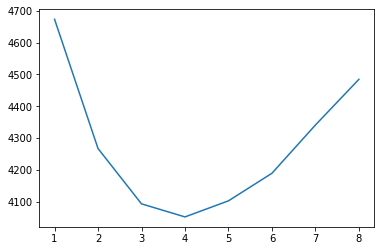

In [44]:
from sklearn.tree import DecisionTreeRegressor

#on va étudier la méthode de SVR
depths = [1,2,3,4,5,6,7,8]
predrisk_tree_mean = []
predrisk_tree = []
predrisk_tree_min = 1000000
dep_min = 0

for dep in depths:
    predrisk_lasso = []
    for s_train, s_test in folds:
        model_tree = DecisionTreeRegressor(max_depth=dep).fit(X_train_lasso.iloc[s_train],Y_train.iloc[s_train].values.ravel())
        Y_pred_tree = model_tree.predict(X_train_lasso.iloc[s_test])
        predrisk_t = mean_squared_error(Y_pred_tree, Y_train.iloc[s_test])
        predrisk_tree.append(predrisk_t)
    predrisk_tree_m = np.mean(predrisk_tree)
    predrisk_tree_mean.append(predrisk_tree_m)
    if predrisk_tree_m < predrisk_tree_min:
        predrisk_tree_min = predrisk_tree_m
        dep_min = dep
plt.plot(depths, predrisk_tree_mean)
print('Réponse:\nLe profondeur optimal de DecisionTress est', dep_min)
print('Le risque de prédiction pour le DecisionTree sur le test est', predrisk_tree_min)
print('La performance de DecisionTree est moins bien que OLS, car les méthodes non linéaires risquent de overfitting.')